#Naive Bayes

*Aula criada por [Lucas de Souza Brandão](https://t.me/bombril80) e [Miller Anacleto Rocha Lima](https://t.me/MillerAnacleto).*

Esse material foi desenvolvido pelo **Data**, grupo de extensão de aprendizado em ciência de dados compostos por alunos do Instituto de Ciências Matemáticas e de Computação da USP.

Para saber mais sobre as atividades do Data, nos siga em [nossas redes sociais](https://linktr.ee/dataicmc).


#Problema



Temos alguns dados sobre o clima de um dia e se é uma boa ideia jogar futebol neste dia ou não.

In [44]:
import pandas as pd

d = {'Aparência': ['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso','Chuvoso','Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Nublado', 'Chuvoso'],
     'Temperatura': ['Quente', 'Quente','Quente','Moderado','Frio','Frio','Frio','Moderado','Frio','Moderado','Moderado','Moderado','Quente','Moderado'],
     'Umidade':['Alta','Alta','Alta','Alta','Normal','Normal','Normal','Alta','Normal','Normal','Normal','Alta','Normal','Alta'],
     'Vento':['Fraco','Forte','Fraco','Fraco','Fraco','Forte','Forte','Fraco','Fraco','Fraco','Forte','Forte','Fraco','Forte'],
     'Jogar Futebol?':['Não','Não','Sim','Sim','Sim','Não','Sim','Não','Sim','Sim','Sim','Sim','Sim','Não']}

df = pd.DataFrame(data=d)
df

,Aparência,Temperatura,Umidade,Vento,Jogar Futebol?
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderado,Alta,Fraco,Sim
4,Chuvoso,Frio,Normal,Fraco,Sim
5,Chuvoso,Frio,Normal,Forte,Não
6,Nublado,Frio,Normal,Forte,Sim
7,Ensolarado,Moderado,Alta,Fraco,Não
8,Ensolarado,Frio,Normal,Fraco,Sim
9,Chuvoso,Moderado,Normal,Fraco,Sim


**Problema: se o dia estiver com aparência *Ensolarado*, temperatura *Moderado*, umidade *Alta* e vento *Forte*, devo jogar futebol?**

Essa informação não está no nosso conjunto de dados, então devemos fazer uma previsão.

Esse é um problema de classificação binária, em que, dadas algumas informações, devemos classificar o item em uma de duas classes.

Como os dados que temos já estão rotulados (para algumas combinações de aparência, temperatura, umidade e vento já sabemos se deve-se jogar futebol ou não), esse problema é de aprendizado supervisionado.

Entre modelos de aprendizado supervisionado que fazem classificação binária, temos:


*   KNN
*   Regressão Logística
*   Perceptron
*   Support Vector Machines
*   Decision Trees
*   Naive Bayes

Assim, veremos como utilizar Naive Bayes para resolver esse tipo de problema, suas vantagens e desvantagens em relação a outros modelos.

#Teorema de Bayes

Naive Bayes é uma interpretação ingênua (*naive* em inglês) do teorema de Bayes. Mas o que é o teorema de Bayes?

**Teorema de Bayes:**
$$P(\text{Y} | \text{X}) = \frac{P(\text{X} | \text{Y}) P(\text{Y})}{P(\text{X})}$$


**O que é X?**
> X são as features. No nosso exemplo, X seria a combinação de aparência, temperatura, umidade e vento.

**O que é Y?**
> Y são as labels. No nosso exemplo, seria a coluna *Jogar Futebol?*.

**O que é P?**
> P significa distribuição. P(Y) é a distribuição de Y, ou seja, a frequência de cada valor de Y.

> Podemos interpretar P(Y=y) como a probabilidade de y ocorrer.

> No nosso exemplo, P(Y) é:


<Axes: >

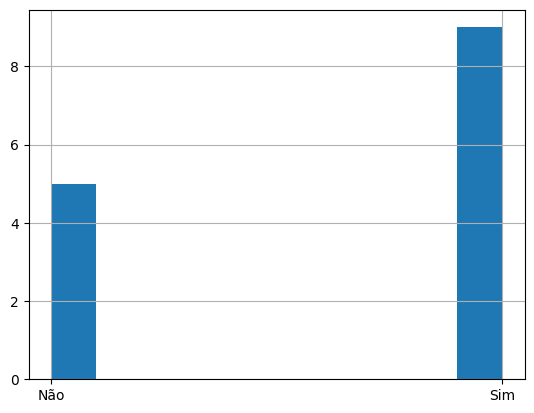

In [45]:
df['Jogar Futebol?'].hist()

**O que é P(Y|X) e P(X|Y)?**
> P(Y|X) representa a distruibuição condicional. Significa a probabilidade de Y dado X. Isso é relevante para casos em que um evento altera a probabilidade do outro. Por exemplo, se a aparência do dia é ensolarada, a probabilidade da temperatura ser quente é maior do que a probabilidade da temperatura ser quente desconsiderando a aparência.

$$P(\text{Temperatura = Quente}) < {P(\text{Temperatura = Quente} | \text{Aparência = Ensolarado})}$$

**Distribuição Conjunta**
>Define a probabilidade de dois eventos ocorrerem simultâneamente. É denotado por P(X,Y).

>Se os eventos são independentes:
$$P(\text{X,Y}) = {P(\text{X})* P(\text{Y})}$$

>Se são dependentes:
$$P(\text{X,Y}) = {P(\text{X} | \text{Y})* P(\text{Y}) }$$
$$P(\text{X,Y}) = {P(\text{Y} | \text{X})* P(\text{X}) }$$

**Teorema de Bayes**
$$P(\text{X,Y}) = P(\text{X,Y}) $$

$${P(\text{Y} | \text{X})* P(\text{X}) } = {P(\text{X} | \text{Y})* P(\text{Y}) }$$


$$P(\text{Y} | \text{X}) = \frac{P(\text{X} | \text{Y}) P(\text{Y})}{P(\text{X})}$$

O teorema de Bayes calcula a probabilidade de ocorrer um evento Y dado um evento X.

Em Machine Learning, isso é o que queremos descobrir. Por exemplo, dados valores de temperatura, aparência, umidade e vento, queremos saber se deve-se jogar futebol ou não.

#Naive Bayes

**Retomando, nosso problema é: "se o dia estiver com aparência Ensolarado, temperatura Moderado, umidade Alta e vento Forte, devo jogar futebol?".**

Nesse caso, X são, na verdade, quatro valores. Então estamos calculando

$${P(\text{Y} | \text{X}_1 \text{, X}_2 \text{, X}_3 \text{, X}_4) }$$

Sendo X fixo (*Ensolarado*, *Moderado*, *Alta* e *Forte*), precisamos saber Y. Para isso, vamos testar todos as j classes de Y (*Sim* e *Não*) e descobrir a classe C mais provável. Na equação a seguir, arg max retorna a classe Yj mais provável.

$$C = \text{arg}_{Yj} \text{ max } {P(\text{Y}_j | \text{X}_1 \text{, X}_2 \text{, X}_3 \text{, X}_4) }$$

Para obter essa classe, devemos usar o teorema de Bayes. Assim,

$$C = \text{arg}_{Yj} \text{ max }  \frac{P(\text{X}_1 {, X}_2 \text{, X}_3 \text{, X}_4| \text{Y}_j) P(\text{Y}_j)}{P(\text{X}_1 {,X}_2 \text{, X}_3 \text{, X}_4)}$$

Analisando os termos:

>$${P(\text{X}_1 {,X}_2 \text{, X}_3 \text{, X}_4)}$$
Representa a probabilidade das features ocorrerem independente de qualquer valor de Y. Como X é fixo e o que vamos variar é Y, esse valor também é fixo e portanto não importa, visto que queremos apenas saber o valor Y que maximiza a probabilidade final. Dessa forma, não vamos calculá-lo.

>$$P(\text{Y}_j)$$
Representa a probabilidade de Y tomar cada valor possível. Para obtê-lo, podemos contar quantas vezes cada valor aparece e dividir pelo total.

>$$P(\text{X}_1 \text{, X}_2 \text{, X}_3 \text{, X}_4 | \text{Y})$$
Representa a probabilidade daquelas features ocorrerem, dado um valor de Y. Por exemplo, a chance de que o dia seja ensolarado, moderado, de umidade alta e vento forte sendo que não se deve jogar futebol. Tal valor é muito difícil de ser calculado, portanto faremos algo ingênuo.

**Como calcular P(X1, X2, X3, X4|Y)?**

Se X1, X2, X3 e X4 fossem eventos independentes, poderiamos assumir o seguinte:

$$P(\text{X}_1 \text{, X}_2 \text{, X}_3 \text{, X}_4 | \text{Y}) = P(\text{X}_1| \text{Y}) * P(\text{X}_2| \text{Y}) * P(\text{X}_3| \text{Y}) * P(\text{X}_4| \text{Y})$$

Ingenuamente, vamos assumir que os valores de X são independentes, mesmo que não sejam. Essa é a interpretação ingênua do Teorema de Bayes que dá nome ao modelo.

De maneira geral, para Naive Bayes:

$$P(\text{X}| \text{Y}) = ∏_{i=1} P(\text{X}_i {|Y})$$

Dessa forma, o que realmente queremos computar é:

$$C = \text{arg}_{Yj} \text{ max } {P(\text{Y}_j)} * {∏_{i=1} P(\text{X}_i {|Y}_j})$$

#Resolvendo o Problema

**Se o dia estiver com aparência Ensolarado, temperatura Moderado, umidade Alta e vento Forte, devo jogar futebol?**



Para os dois valores de Y possíveis, vamos calcular

$${P(\text{Y}_j)} * {∏_{i=1}^4 P(\text{X}_i {|Y}_j})$$

In [46]:
#Conjunto de dados completo
df

,Aparência,Temperatura,Umidade,Vento,Jogar Futebol?
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderado,Alta,Fraco,Sim
4,Chuvoso,Frio,Normal,Fraco,Sim
5,Chuvoso,Frio,Normal,Forte,Não
6,Nublado,Frio,Normal,Forte,Sim
7,Ensolarado,Moderado,Alta,Fraco,Não
8,Ensolarado,Frio,Normal,Fraco,Sim
9,Chuvoso,Moderado,Normal,Fraco,Sim


###Y=Não

$${P(\text{Y = Não}) = \frac{5}{14}} $$

$${P(\text{Aparência=Ensolarado} { | Y=Não}}) = \frac{3}{5} $$

$${P(\text{Temperatura=Moderado} { | Y=Não}}) = \frac{2}{5} $$

$${P(\text{Umidade=Alta} { | Y=Não}}) = \frac{4}{5} $$

$${P(\text{Vento=Forte} { | Y=Não}}) = \frac{3}{5} $$

$${P(\text{Y=Não})} * {∏_{i=1}^{4} P(\text{X}_i {|Y=Não}}) = \frac{5}{14} * \frac{3}{5}*\frac{2}{5}*\frac{4}{5}*\frac{3}{5}$$

$${P(\text{Y=Não|Aparência=Ensolarado, Temperatura=Moderado, Umidade=Alta, Vento=Forte}) = 0,0411}$$




In [47]:
(5/14) * (3/5) * (2/5) * (4/5) * (3/5)

0.04114285714285714

###Y=Sim

$${P(\text{Y = Sim}) = \frac{9}{14}} $$

$${P(\text{Aparência=Ensolarado} { | Y=Sim}}) = \frac{2}{9} $$

$${P(\text{Temperatura=Moderado} { | Y=Sim}}) = \frac{4}{9} $$

$${P(\text{Umidade=Alta} { | Y=Sim}}) = \frac{3}{9} $$

$${P(\text{Vento=Forte} { | Y=Sim}}) = \frac{3}{9} $$

$${P(\text{Y=Sim})} * {∏_{i=1}^{4} P(\text{X}_i {|Y=Sim}}) = \frac{9}{14} * \frac{2}{9}*\frac{4}{9}*\frac{3}{9}*\frac{3}{9}$$

$${P(\text{Y=Sim|Aparência=Ensolarado, Temperatura=Moderado, Umidade=Alta, Vento=Forte}) = 0,0070}$$


In [48]:
(9/14) * (2/9) * (4/9) * (3/9) * (3/9)

0.007054673721340388

###Encontrando o mais provável

$${P(\text{Y=Não|Aparência=Ensolarado, Temperatura=Moderado}) = 0,04}$$

$${P(\text{Y=Sim|Aparência=Ensolarado, Temperatura=Moderado}) = 0,007}$$

Como Y=Não é o mais provável, podemos dizer que, se o dia for ensolarado com temperatura moderada, umidade alta e vento forte, não devemos jogar futebol.

#Prós e Contras

**Prós:**

* Rápido.
* Simples de implementar.
* Se as features forem realmente independentes o classificador é quase perfeito.
* Precisa de poucos dados.

**Contras:**

* Na prática, é muito improvável que as features sejam independentes.
* Se algum dado não aparecer nenhuma vez, a probabilidade vira zero.
* Ruim para conjuntos de dados desbalanceados.
* Não é muito bom para features de valores contínuos (números reais).
* As probabilidades geradas pelo modelo não são tão precisas.

#Detectando Spam

Na detecção de spam, classificamos se um email é spam ou não a partir de seu texto. Para isso, fazemos uma contagem de todas as palavras de todos os emails do dataset e usamos isso para estimar a probabilidade de cada palavra de determinado email que queremos analisar.



Primeiro, vamos abrir o [dataset](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) e analisá-lo.

In [52]:
#fazendo download e extraindo o arquivo .zip
!wget https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip
!unzip sms+spam+collection.zip

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'unzip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [53]:
import pandas as pd
import numpy as np

df = pd.read_csv("SMSSpamCollection", sep='\t', names=["Label","Email"])
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SMSSpamCollection'

In [ ]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

Assim, vemos que a tabela possui duas colunas: _Label_ e _Email_
 - A coluna _Label_ indica se aquela mensagem foi marcada como spam (mensagens legítimas estão marcadas como "ham")
 - A coluna _Email_ possui o conteúdo da mensagem


Para contar as palavras do dataset, usaremos o CountVectorizer da biblioteca Scikit-Learn.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer #Importando a classe

vectorizer = CountVectorizer() #Instanciando objeto
X = vectorizer.fit_transform(df.Email.tolist()).toarray() #Transformando o texto em um vetor de contagem

print(X.shape)
X

AttributeError: 'DataFrame' object has no attribute 'Email'

Agora, devemos transformar as labels em números para podermos utilizar o Naive Bayes da Sklearn. Assim, usaremos o [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) da mesma biblioteca.

In [ ]:
from sklearn import preprocessing #Importando a classe

le = preprocessing.LabelEncoder() #Instanciando objeto

le.fit(df['Label']) #"Ensinando" ao objeto nosso conjunto de dados
Y = le.transform(df['Label']) #Pedindo para ele transformar em números

Y

KeyError: 'Label'

Vamos dividir os dados filtrados em treino e teste utilizando a biblioteca Scikit Learn. ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined

Agora, usaremos a função MultinomialNB ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)) para treinar um modelo Naive Bayes no conjunto de teste:

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(force_alpha=True)
model.fit(X_train, Y_train)

NameError: name 'X_train' is not defined

Por fim, podemos calcular a acurácia do modelo nos dados de teste ainda com a mesma biblioteca. ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [ ]:
from sklearn.metrics import accuracy_score
print('Acurácia: %.2lf%%' % (accuracy_score(Y_test, model.predict(X_test))*100))

NameError: name 'Y_test' is not defined

In [ ]:
def pred(message):
    inputs = vectorizer.transform([message]) #transformando a mensagem em um vetor de contagem de palavras
    prob = model.predict_proba(inputs)
    print('spam probability: %.2f %%' % (100*prob[0][1],))

message = 'is this message spam?'
pred(message)

message = 'get an iphone for free now'
pred(message)

message = 'I need to have a meeting with you tomorrow'
pred(message)

spam probability: 13.42 %
spam probability: 80.69 %
spam probability: 0.02 %


#Exercício


https://www.kaggle.com/datasets/crawford/20-newsgroups

O conjunto de dados "20 Newsgroups" é usado para classificação de texto. Ele contém posts de grupos de discussão sobre diferentes tópicos. As classes representam esses tópicos, como ciência e espaço. Usando Naive Bayes, podemos treinar modelos para prever a qual tópico um novo post pertence com base em palavras-chave. Isso ajuda a organizar informações e automatizar a categorização de textos.

*Lista de Tópicos*
- comp.os.ms-windows.misc (Computadores - Windows)
- comp.sys.ibm.pc.hardware (Computadores - Hardware IBM/PC)
- omp.sys.mac.hardware (Computadores - Hardware Macintosh)
- comp.windows.x (Computadores - Windows X)
- rec.autos (Automóveis - Discussões)
- rec.motorcycles (Motocicletas - Discussões)
- sci.crypt (Ciência - Criptografia)
- sci.electronics (Ciência - Eletrônica)
- sci.med (Ciência - Medicina)
- sci.space (Ciência - Espaço)
- soc.religion.christian (Sociedade - Religião Cristã)
- talk.politics.guns (Discussões - Política de Armas)
- talk.politics.mideast (Discussões - Política do Oriente Médio)
- talk.politics.misc (Discussões - Política Diversa)
- talk.religion.misc (Discussões - Religião Diversa)

## Carregar o conjunto de dados "20 Newsgroups"

1. Rode a célula abaixo e visualize um post (se quiser visualizar melhor os dados use "remove=('headers', 'footers', 'quotes')" como parâmetro de fetch_20newsgroups e veja a diferença)



In [55]:
from sklearn.datasets import fetch_20newsgroups

categories = ['#####', '#####']  # Escolha duas categorias para simplificar

newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

print(newsgroups.data[1])

KeyboardInterrupt: 

In [ ]:
# @title Resposta 1
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.med', 'sci.space']

newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

print(newsgroups.data[1])

## Vetorizar os documentos usando a contagem de palavras

2. Use CountVectorizer e fit_transform para contar as palavras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = #?

X = #?

In [ ]:
# @title Resposta 2
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(newsgroups.data)

## Dividir os dados em treinamento e teste

3. Use train_test_split para dividir os dados

In [ ]:
from sklearn.model_selection import train_test_split

## ???

In [ ]:
# @title Resposta 3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)

## Treinar um classificador Naive Bayes (MultinomialNB)

4. Use a classe MultinomialNB para treinar o classificador.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = #?
## ???

In [ ]:
# @title Resposta 4
clf = MultinomialNB()
clf.fit(X_train, y_train)

## Fazer previsões no conjunto de teste e Calcular a acurácia

5. Prediza os resultados dos teste e mostre a acurácia

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = # ?

accuracy = # ?
print("Acurácia:", accuracy)

In [ ]:
# @title Resposta 5
# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

## Gabarito

In [ ]:
# @title Resposta Gabarito
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados "20 Newsgroups"
# categories = ['sci.med', 'sci.space']  # Escolha duas categorias para simplificar
# newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Vetorizar os documentos usando a contagem de palavras
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, newsgroups.target, test_size=0.2, random_state=42)

# Treinar um classificador Naive Bayes (MultinomialNB)
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8742705570291777


In [ ]:
def pred(message):

    inputs = vectorizer.transform([message]) #transformando a mensagem em um vetor de contagem de palavras
    prob = clf.predict_proba(inputs)
    print(f'Classe: {newsgroups.target_names[np.array(prob).argmax()]} com uma probalidade de: %.2f %%' % (100*prob[0][np.array(prob).argmax()]))

message = 'lets talk, about space'
pred(message)

message = 'get an iphone screen for free now'
pred(message)

message = 'I need to have a meeting with god tomorrow'
pred(message)

Classe: sci.space com uma probalidade de: 64.14 %
Classe: comp.graphics com uma probalidade de: 50.05 %
Classe: soc.religion.christian com uma probalidade de: 77.46 %
